# <span style="color:steelblue">Integranting with Monte Carlo</span>

## Let's calculate the value of $\pi$ with the Monte Carlo method. To do this, consider an unitary circle centered at origin inside a square of side $L=2$. The area of the circle will be $A=\pi$.


## We will see that with the Monte Carlo method, the procedure of integrate will consist on counting the number of points (randomly generated) that are inside and outside the circle.

In [63]:
from random import uniform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

inside = 0 # number of points inside the circle
total = 10**4 # number of total points

# coordinates (x,y) inside the circle
x_inside = []
y_inside = []

# coordinates (x,y) outside the circle
x_outside = []
y_outside = []

for _ in range(total):
    # Generate random numbers between -1 y 1 for coordinates (x,y)
    x = uniform(-1,1)
    y = uniform(-1,1)
    # Condition for points inside the circle
    if x**2+y**2 <= 1:
        inside += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)
        
# define area
A = float(inside)/float(total)

pi= 4*A

print 'The value of pi is', "%.4f" % pi
print 'The difference between our estimation and the actual value of pi is', "%.2f" % (abs(np.pi - pi)*100),'%'

The value of pi is 3.1516
The difference between our estimation and the actual value of pi is 1.00 %


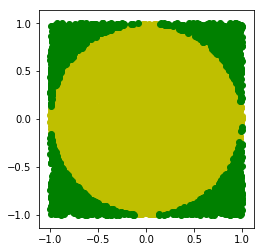

In [64]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_inside, y_inside, color='y', marker='o')
ax.scatter(x_outside, y_outside, color='g', marker='o')

# <span style="color:steelblue">Exercise to obtain the $\chi^2$ function</span>

## Determine the elasticity constant $k$ of a spring.

### The elongation of a vertical spring is measured by testing several masses. The data of the masses and the elongation is given. The error in these quantitites are randomly generated.

### Mass is measured in grams, and the elongation in cm.

In [65]:
masa = np.array([0.0,90.80,181.60,272.40,363.20,454.00,544.80,635.60,726.40,817.20,908.00,998.80,1089.60,1180.40,1271.20,1362.00,1452.80,1543.60,1634.40,1725.20])
elon = np.array([12.85,12.73,13.00,13.03,13.06,13.11,13.34,13.18,13.31,13.87,13.72,14.15,13.89,14.05,14.25,14.20,14.25,14.61,14.43,14.73])
elon_error = np.random.normal(0.1,0.2,len(elon))
masa_error = np.random.normal(0.1,30.,len(masa))

## How this set of data looks like?

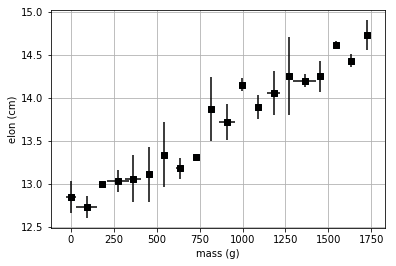

In [66]:
plt.plot(masa,elon,'s')
plt.errorbar(masa,elon,xerr=masa_error,yerr=elon_error,fmt='ks')
plt.xlabel('mass (g)')
plt.ylabel('elon (cm)')
plt.grid(True)

## Now let's define the theoretical model: a straight line $y = mx + b$

In [67]:
def R(mass,p,pc):
    return p*mass + pc

In [68]:
chisq_k=lambda p,pc:(((elon-R(masa,p,pc))**2)/elon_error**2).sum()

chisq_k = np.vectorize(chisq_k)

In [69]:
number_elem_pend = 20
number_elem_pto_corte = 20

min_pend = 0.
max_pend = 0.0013
min_pto_corte = 10.
max_pto_corte = 13.

number_of_combinations = number_elem_pend*number_elem_pto_corte

pend = np.linspace(min_pend,max_pend,number_elem_pend)
pto_corte = np.linspace(min_pto_corte,max_pto_corte,number_elem_pto_corte)

chisq_spring = []

for i in range(len(pend)):
    for j in range(len(pto_corte)):
        chisq_spring_scan = chisq_k(pend[i],pto_corte[j])
        chisq_spring.append(chisq_spring_scan)

In [70]:
chisq_spring = np.array(chisq_spring)

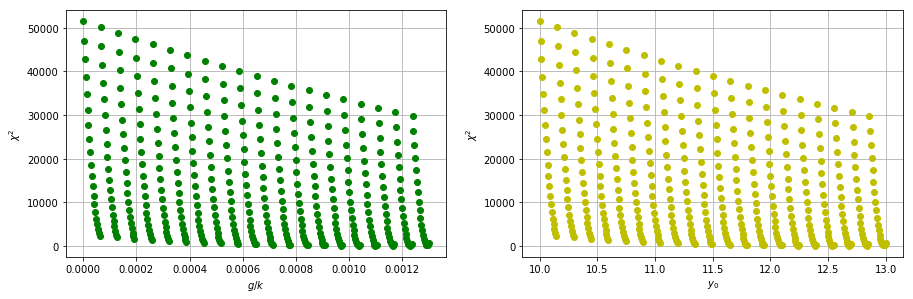

In [71]:
pend_lin = np.linspace(min_pend,max_pend,number_of_combinations)
pto_corte_lin = np.linspace(min_pto_corte,max_pto_corte,number_of_combinations)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
ax.set_xlabel(r'$g/k$')
ax.set_ylabel(r'$\chi^2$')
ax.plot(pend_lin,chisq_spring,'o',color='g')
ax.grid(True)
ax2 = fig.add_subplot(222)
ax2.set_xlabel(r'$y_0$')
ax2.set_ylabel(r'$\chi^2$')
ax2.plot(pto_corte_lin,chisq_spring,'o',color='y')
ax2.grid(True)

In [72]:
best_values = np.where(chisq_spring == np.min(chisq_spring))
gk_best = pend_lin[best_values]
y0_best = pto_corte_lin[best_values]
print 'The best value of the slope is', gk_best
print 'The best value of intersection is', y0_best

The best value of the slope is [ 0.00116316]
The best value of intersection is [ 12.68421053]


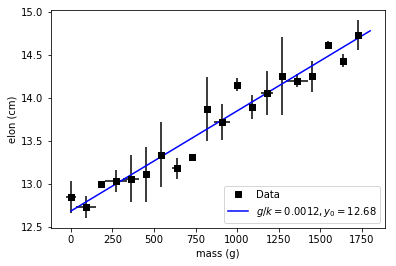

In [73]:
x = np.linspace(0.,1800,100)
plt.plot(masa,elon,'ks',label='Data')
plt.errorbar(masa,elon,xerr=masa_error,yerr=elon_error,fmt='ks')
plt.plot(x,R(x,gk_best,y0_best),linestyle='-',color='b',label=r'$g/k=%.4f, y_0=%.2f$' % (gk_best,y0_best))
plt.xlabel('mass (g)')
plt.ylabel('elon (cm)')
legend = plt.legend(loc='lower right', prop={'size':10})

## The value of the elasticity constant can be obtained from: $y = \frac{g}{k}m + y_0$

## Then, from the slope $m$ we have: $m=\frac{g}{k} \Rightarrow k = \frac{g}{m}$

In [74]:
from decimal import Decimal

print 'k =',"%.2E" % ((980/0.0012)*10**(-3)), 'N/m'

k = 8.17E+02 N/m


## Thus, the elasticity constant is $k = 8.17\times 10^2\rm{N}/\rm{m}$

# --------------------------------------------------------------------------------------------

# <span style="color:steelblue">M</span>arkov <span style="color:steelblue">C</span>hain <span style="color:steelblue">M</span>onte <span style="color:steelblue">C</span>arlo (one parameter)

## Using a MCMC, and considering the previous exercise of a mass-spring system, let's obtain the best value of intersection parameter $y_0$ of the straight line, by fixing the slope $g/k$ to its best value.

In [76]:
mass = np.array([0.0,90.80,181.60,272.40,363.20,454.00,544.80,635.60,726.40,817.20,908.00,998.80,1089.60,1180.40,1271.20,1362.00,1452.80,1543.60,1634.40,1725.20])
elong = np.array([12.85,12.73,13.00,13.03,13.06,13.11,13.34,13.18,13.31,13.87,13.72,14.15,13.89,14.05,14.25,14.20,14.25,14.61,14.43,14.73])
elong_error = np.random.normal(0.1,0.2,len(elong))
mass_error = np.random.normal(0.1,30.,len(mass))

In [616]:
def theo_model(x_values,m,b):
    return m*x_values + b

theo_model = np.vectorize(theo_model)

def LogLi(params):
    b = params[0]
    C2 = 0
    for i in range(len(mass)):
        C2_sum = ((elong[i]-theo_model(mass[i],0.0011,b))**2)/((elong_error[i])**2)
        C2 += C2_sum
    return -C2/2.

In [617]:
ini_value = [12.6]
chain = [ini_value]
likelihood_chain = [LogLi(ini_value)]
step = [1.e-2]
number_steps = 2000
accep = 0

In [618]:
for i in range(number_steps):
    # Generamos un número aleatorio
    rand = np.random.normal(0.,1.,1)
    new_point = chain[i] + step*rand
    # Calculamos el likelihood en el nuevo punto
    LogLi_test = LogLi(new_point)
    # Ahora calculamos la probabilidad de aceptación
    if LogLi_test > likelihood_chain[i]:
        prob_acep = 1
    else:
        prob_acep = np.exp(LogLi_test - likelihood_chain[i])

    # Comparamos la probabilidad de aceptación con un número aleatorio entre 0 y 1
    if prob_acep >= np.random.uniform(0.,1.):
        chain.append(new_point)
        likelihood_chain.append(LogLi_test)
        accep += 1
    else:
        chain.append(chain[i])
        likelihood_chain.append(likelihood_chain[i])

print "Razon de aceptacion =",float(accep)/float(number_steps)

Razon de aceptacion = 0.3385


In [619]:
chain = np.array(chain)

In [620]:
gk_mean = np.mean(chain)
print "%.7f" % gk_mean

12.7546362


In [621]:
gk_std = np.std(chain)
print gk_std

0.0125129804451


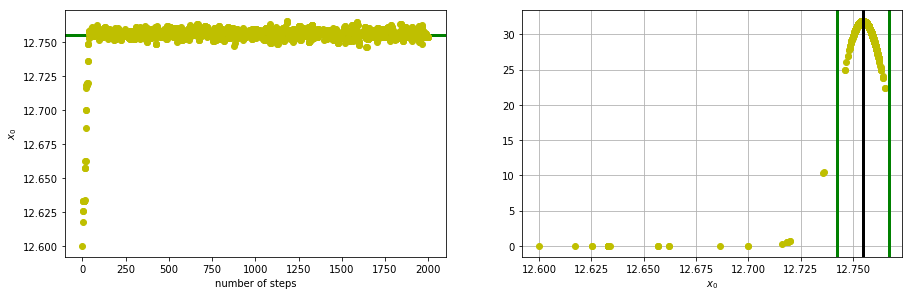

In [623]:
import matplotlib.mlab as mlab

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
ax.set_xlabel('number of steps')
ax.set_ylabel(r'$x_0$')
ax.axhline(y=gk_mean, color='g', linewidth=3, linestyle='-')
ax.plot(chain,'o',color='y')
ax2= fig.add_subplot(222)
ax2.set_xlabel(r'$x_0$')
ax2.plot(chain,mlab.normpdf(chain, gk_mean, gk_std),'o',color='y')
ax2.axvline(x=gk_mean, color='k', linewidth=3, linestyle='-')
ax2.axvline(x=gk_mean+gk_std, color='g', linewidth=3, linestyle='-')
ax2.axvline(x=gk_mean-gk_std, color='g', linewidth=3, linestyle='-')
ax2.grid(True)

# --------------------------------------------------------------------------------------------


# <span style="color:steelblue">M</span>arkov <span style="color:steelblue">C</span>hain <span style="color:steelblue">M</span>onte <span style="color:steelblue">C</span>arlo (two parameters)

## Now, let's obtain the best value of both, the slope $g/k$ and the intersection parameter $y_0$ using a MCMC.

In [77]:
def theo_model(x_values,m,b):
    return m*x_values + b

theo_model = np.vectorize(theo_model)

def LogLi(params):
    m = params[0]
    b = params[1]
    C2 = 0
    for i in range(len(mass)):
        C2_sum = ((elong[i]-theo_model(mass[i],m,b))**2)/((elong_error[i])**2)
        C2 += C2_sum
    return -C2/2.

In [78]:
ini_value = [0.001,12.5]
chain = [ini_value]
likelihood_chain = [LogLi(ini_value)]
step = [1.e-4,1.e-2]
number_steps = 5000
accep = 0

In [79]:
for i in range(number_steps):
    # Generamos un número aleatorio
    gk_rand = np.random.normal(0.,1.,1)
    x0_rand = np.random.normal(0.,1.,1)
    new_point = [chain[i][0] + step[0]*gk_rand,chain[i][1] + step[1]*x0_rand]
    # Calculamos el likelihood en el nuevo punto
    LogLi_test = LogLi(new_point)
    # Ahora calculamos la probabilidad de aceptación
    if LogLi_test > likelihood_chain[i]:
        prob_acep = 1
    else:
        prob_acep = np.exp(LogLi_test - likelihood_chain[i])

    # Comparamos la probabilidad de aceptación con un número aleatorio entre 0 y 1
    if prob_acep >= np.random.uniform(0.,1.):
        chain.append(new_point)
        likelihood_chain.append(LogLi_test)
        accep += 1
    else:
        chain.append(chain[i])
        likelihood_chain.append(likelihood_chain[i])

print "Razon de aceptacion =",float(accep)/float(number_steps)

Razon de aceptacion = 0.0808


In [80]:
chain = np.array(chain)

In [81]:
gk_chain = chain[:,0]
x0_chain = chain[:,1]

In [82]:
gk_mean = np.mean(gk_chain)
x0_mean = np.mean(x0_chain)
print "%.7f" % gk_mean
print "%.3f" % x0_mean

0.0012074
12.602


In [83]:
gk_std = np.std(gk_chain)
x0_std = np.std(x0_chain)
print gk_std
print x0_std

2.4848133047e-05
0.0246962390965


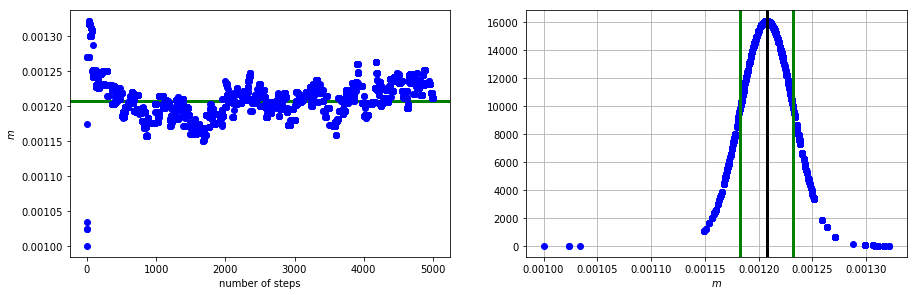

In [84]:
import matplotlib.mlab as mlab

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
ax.set_xlabel('number of steps')
ax.set_ylabel(r'$m$')
ax.axhline(y=gk_mean, color='g', linewidth=3, linestyle='-')
ax.plot(gk_chain,'o',color='b')
ax2= fig.add_subplot(222)
ax2.set_xlabel(r'$m$')
ax2.plot(gk_chain,mlab.normpdf(gk_chain, gk_mean, gk_std),'o',color='b')
ax2.axvline(x=gk_mean, color='k', linewidth=3, linestyle='-')
ax2.axvline(x=gk_mean+gk_std, color='g', linewidth=3, linestyle='-')
ax2.axvline(x=gk_mean-gk_std, color='g', linewidth=3, linestyle='-')
ax2.grid(True)

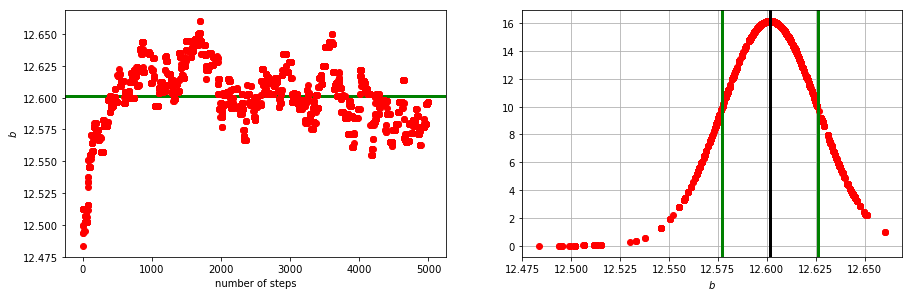

In [85]:
import matplotlib.mlab as mlab

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
ax.set_xlabel('number of steps')
ax.set_ylabel(r'$b$')
ax.axhline(y=x0_mean, color='g', linewidth=3, linestyle='-')
ax.plot(x0_chain,'o',color='r')
ax2= fig.add_subplot(222)
ax2.set_xlabel(r'$b$')
ax2.plot(x0_chain,mlab.normpdf(x0_chain, x0_mean, x0_std),'o',color='r')
ax2.axvline(x=x0_mean, color='k', linewidth=3, linestyle='-')
ax2.axvline(x=x0_mean+x0_std, color='g', linewidth=3, linestyle='-')
ax2.axvline(x=x0_mean-x0_std, color='g', linewidth=3, linestyle='-')
ax2.grid(True)

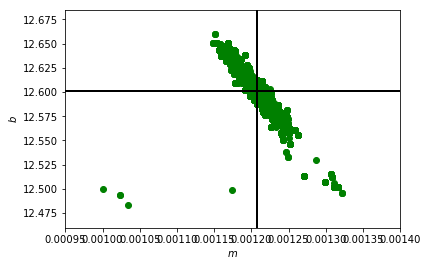

In [86]:
plt.scatter(gk_chain,x0_chain,color='g')
plt.axhline(y=x0_mean, color='k', linewidth=2, linestyle='-')
plt.axvline(x=gk_mean, color='k', linewidth=2, linestyle='-')
plt.xlim(0.00095,0.0014)
plt.xlabel(r'$m$')
plt.ylabel(r'$b$')